# Ejercicio 6 Parcial 2 Introducción a la Teoría de Grafos

Suponga que $T = \{(i, j) : 1 \leq i \leq 8, 1 \leq j \leq 8 \}$ es un tablero de ajedrez. El caballo se puede mover a la casilla más cercana que no se encuentre en su propia fila, columna o diagonal, aunque para simplificar se dice que se mueve avanzando dos casillas en vertical y una en horizontal, o viceversa, realizando un movimiento de $"L"$.

## Descripción del Algoritmo

### Instrucción:
Describa un algoritmo que tome como entrada una posición inicial y una posición final para un caballo, y describa los movimientos que debe realizar el caballo para ir de la posición inicial a la final en la menor cantidad de jugadas posible.

### Propuesta:
El algoritmo va a recibir como entrada una posición inicial $(i, j)$ y una posición final $(r, s)$ de la jugada que va a realizar y retorna el camino más corto para realizar dicha jugada. Vamos a tomar como existente una función $horse(i, j)$ que devolverá una lista de las tuplas $(i, j)$ a las cuales puede llegar (por verificaciones en tipo movimiento). Vamos a emular una suerte de BFS, donde cada nodo del grafo será una posición del tablero de ajedrez al que puedo llegar desde el vértice anterior.
La raíz del árbol será la $(i, j)$ inicial dada, y recursivamente se llamará a $horse(i, j)$ para revisar a donde puedo llegar siendo estas las primeras posiciones a revisar. Siguiendo el algoritmo BFS, para cada padre revisaremos a que casillas puedo llegar y verificamos que previamente no hayamos procesado dicha posición (si es así no es elegible en el grafo creado, puede hacerse con una lista de posiciones faltantes de las $64$ posibles), de no ser así procesamos dichas posiciones de acuerdo al algoritmo.

Previo al procesamiento anterior hacemos nuestra "condición de salida", si uno de estos vértices a procesar es la posición final $(r, s)$, hemos acabado y basta con devolvernos por el camino creado para reconstruir y obtener el camino más corto a seguir por el caballo en su transcurso desde $(i, j)$ hasta $(r, s)$. Retornamos el camino y detenemos la aplicación del BFS.

## Implementación del Algoritmo

In [109]:
# Implementación de la función horse, será la encargada de devolver los posibles movimientos del caballo en nuestro tablero de ajedrez
def horse(i, j):
    # Atributo de guardado de la lista de movimientos posibles
    movimientos_posibles = []
    # Verificaciones necesarias de la cabida de los 8 posibles movimientos de un caballo en el tablero de ajedrez 8x8
    if i+2 <= 8 and j+1 <= 8:
        movimientos_posibles.append((i+2, j+1))
    if i+2 <= 8 and j-1 >= 1:
        movimientos_posibles.append((i+2, j-1))
    if i-2 >= 1 and j+1 <= 8:
        movimientos_posibles.append((i-2, j+1))
    if i-2 >= 1 and j-1 >= 1:
        movimientos_posibles.append((i-2, j-1))
    if j+2 <= 8 and i+1 <= 8:
        movimientos_posibles.append((i+1, j+2))
    if j+2 <= 8 and i-1 >= 1:
        movimientos_posibles.append((i-1, j+2))
    if j-2 >= 1 and i+1 <= 8:
        movimientos_posibles.append((i+1, j-2))
    if j-2 >= 1 and i-1 >= 1:
        movimientos_posibles.append((i-1, j-2))
    return movimientos_posibles

In [110]:
from collections import deque
import matplotlib.pyplot as plt
import numpy as np

In [111]:
# Implementación del algoritmo que devuelve el camino más corto que puede realizar un caballo para ir de la posición inicial a la posición final
def camino_caballo(posicion_inicial, posicion_final):
    # Creación de la cola de posiciones a visitar por el algoritmo, esta va a estar compuesta por la posición y el camino para llegar a dicha posición
    posiciones_a_visitar = deque([(posicion_inicial, [])])
    # Creación de la lista de posiciones ya visitadas con el fin de solo tomarlas en cuenta 1 vez
    posiciones_visitadas = [posicion_inicial]
    
    while posiciones_a_visitar:
        # Tomo la primera posición de la cola para verificarla y la elimino de la cola, al hacerlo me retorna ambos atributos ya almacenados
        posicion_actual, camino_actual = posiciones_a_visitar.popleft()
        
        # Hago la verificación por si he llegado a la posición necesitada
        if posicion_actual == posicion_final:
            # Retorno el camino
            return camino_actual + [posicion_actual]
        
        # Busco a que caminos puedo llegar a partir de mi posición actual llamando a la función horse previamente definida
        movimientos_caballo = horse(posicion_actual[0], posicion_actual[1])
        # Verifico si el movimiento ya ha sido previamente revisado
        for movimiento in movimientos_caballo:
            if movimiento not in posiciones_visitadas:
                # De no haber sido revisado lo agrego a la cola y a las posiciones verificadas para evitar revisarla varias veces
                # Cuando agrego a la cola lo hago con la posición y el camino para llegar a dicha posición
                posiciones_visitadas.append(movimiento)
                camino_agregado = camino_actual + [posicion_actual]
                posiciones_a_visitar.append((movimiento, camino_agregado))
    
    # De no encontrarse un camino y como opción final se retornará una lista vacía para verificar que no hay un camino entre las dos posiciones.
    return []

### Implementación de una Graficación para términos de Ejemplificación

In [112]:
# Función desarrollada con el fin de hacer un gráfico para visualizar mejor el camino obtenido
def visualizar_tablero(camino):
    # Creación de una matriz de ceros de 8x8 para representar el tablero de ajedrez
    tablero = np.zeros((8, 8), dtype=int)
    for i, (x, y) in enumerate(camino):
        # Marco las casillas del camino con números de 1 a n
        tablero[x - 1][y - 1] = i + 1

    # Creación de una figura y un eje para el gráfico
    fig, ax = plt.subplots()
    
    # Creación de un patrón de tablero de ajedrez con casillas negras y blancas
    tablero_ajedrez = np.zeros_like(tablero, dtype=int)
    tablero_ajedrez[1::2, ::2] = 1
    tablero_ajedrez[::2, 1::2] = 1
    
    # Coloreo las casillas del tablero con el patrón
    ax.matshow(tablero_ajedrez, cmap='gray')

    # Itero sobre todas las casillas del tablero
    for i in range(8):
        for j in range(8):
            if tablero[i][j] > 0:
                if tablero[i][j] % 2 == 0:
                    # Cambio el color de fondo a negro para números pares
                    color = 'black'
                else:
                    # Cambio el color de fondo a blanco para números impares
                    color = 'white'
                # Agrego un número en el centro de la casilla con color personalizado
                ax.text(j, i, str(tablero[i][j]), ha='center', va='center', color=color, fontsize=12, fontweight='bold')

    # Cambio el rango de las etiquetas de los ejes x e y y la posición de las etiquetas
    plt.xticks(range(8), range(1, 9))
    plt.yticks(range(8), range(1, 9))
    # Invierto el eje y para que el tablero se vea correctamente
    plt.gca().invert_yaxis()
    plt.show()

### Ejemplificaciones

El caballo puede llegar de (1, 1) a (8, 8) en 6 movimientos.
Camino:
Posición 1: (1, 1)
Posición 2: (3, 2)
Posición 3: (5, 3)
Posición 4: (7, 4)
Posición 5: (5, 5)
Posición 6: (7, 6)
Posición 7: (8, 8)


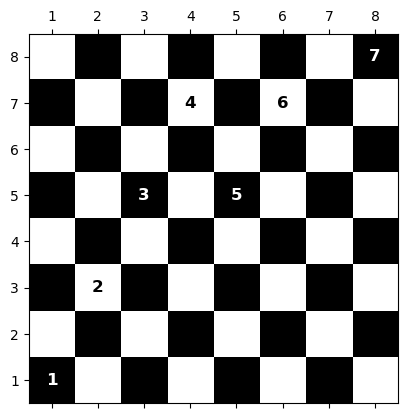

In [113]:
# Ejemplo de uso 1:
posicion_inicial = (1, 1)
posicion_final = (8, 8)
camino = camino_caballo(posicion_inicial, posicion_final)

if camino:
    print(f"El caballo puede llegar de {posicion_inicial} a {posicion_final} en {len(camino) - 1} movimientos.")
    print("Camino:")
    for paso, posicion in enumerate(camino):
        print(f"Posición {paso + 1}: {posicion}")

    # Visualizar el tablero con el recorrido
    visualizar_tablero(camino)
else:
    print(f"No hay un camino válido para llegar de {posicion_inicial} a {posicion_final}.")

El caballo puede llegar de (6, 4) a (7, 5) en 2 movimientos.
Camino:
Posición 1: (6, 4)
Posición 2: (8, 3)
Posición 3: (7, 5)


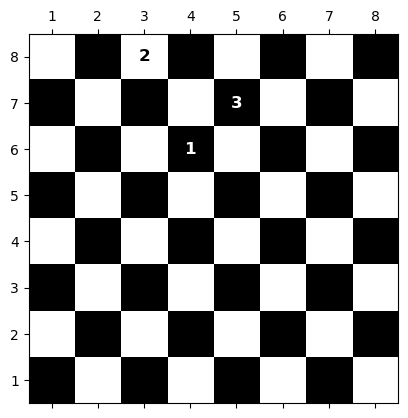

In [114]:
#Ejemplo de uso 2:
posicion_inicial = (6, 4)
posicion_final = (7, 5)
camino = camino_caballo(posicion_inicial, posicion_final)

if camino:
    print(f"El caballo puede llegar de {posicion_inicial} a {posicion_final} en {len(camino) - 1} movimientos.")
    print("Camino:")
    for paso, posicion in enumerate(camino):
        print(f"Posición {paso + 1}: {posicion}")

    # Visualizar el tablero con el recorrido
    visualizar_tablero(camino)
else:
    print(f"No hay un camino válido para llegar de {posicion_inicial} a {posicion_final}.")

El caballo puede llegar de (3, 5) a (8, 2) en 4 movimientos.
Camino:
Posición 1: (3, 5)
Posición 2: (5, 6)
Posición 3: (7, 5)
Posición 4: (6, 3)
Posición 5: (8, 2)


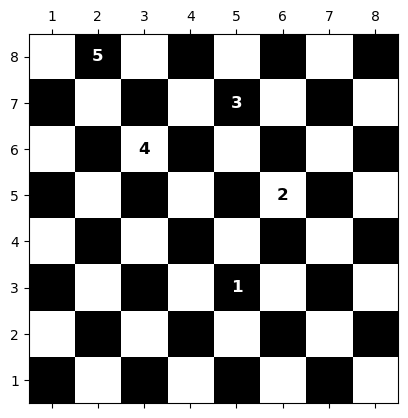

In [115]:
#Ejemplo de uso 3:
posicion_inicial = (3, 5)
posicion_final = (8, 2)
camino = camino_caballo(posicion_inicial, posicion_final)

if camino:
    print(f"El caballo puede llegar de {posicion_inicial} a {posicion_final} en {len(camino) - 1} movimientos.")
    print("Camino:")
    for paso, posicion in enumerate(camino):
        print(f"Posición {paso + 1}: {posicion}")

    # Visualizar el tablero con el recorrido
    visualizar_tablero(camino)
else:
    print(f"No hay un camino válido para llegar de {posicion_inicial} a {posicion_final}.")